In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,to_categorical
import os

In [2]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
filenames=os.listdir('D:\ANN\catsdogs\images')
categories=[]
for f in filenames:
    category=f.split(' ')[0]
    if category=='dogs':
        categories.append(1)
    else:
        categories.append(0)
        
data=pd.DataFrame({'filenames':filenames,'categories':categories})
data

,filenames,categories
0,cat (1).db,0
1,cat (1).jpg,0
2,cat (10).jpg,0
3,cat (100).jpg,0
4,cat (101).jpg,0
...,...,...
1008,dogs (95).jpg,1
1009,dogs (96).jpg,1
1010,dogs (97).jpg,1
1011,dogs (98).jpg,1


<AxesSubplot: >

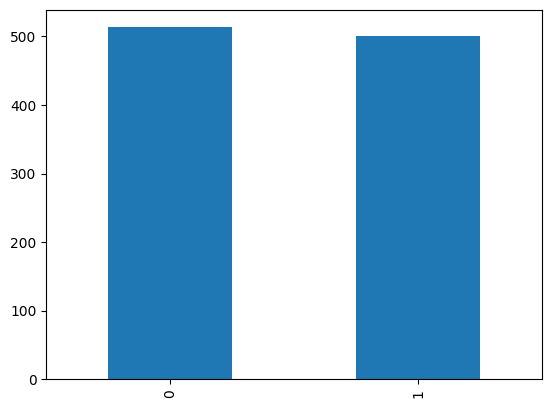

In [4]:
data['categories'].value_counts().plot.bar()


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization,Dense,Activation
m=Sequential()

m.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.25))

m.add(Conv2D(64,(3,3),activation='relu'))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.25))

m.add(Flatten())
m.add(Dense(512,activation='relu'))
m.add(BatchNormalization())
m.add(Dropout(0.5))      
m.add(Dense(2,activation='softmax'))

m.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

<AxesSubplot: >

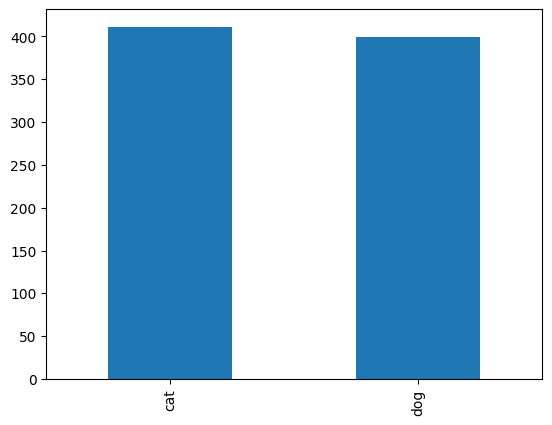

In [6]:
data['categories']=data['categories'].replace({0:'cat',1:'dog'})
from sklearn.model_selection import train_test_split
traindf,validatedf=train_test_split(data,test_size=0.2)
traindf=traindf.reset_index(drop=True)
validatedf=validatedf.reset_index(drop=True)

traindf['categories'].value_counts().plot.bar()

In [7]:
train_datagen=ImageDataGenerator(rotation_range=15,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1.1255)
train_generator=train_datagen.flow_from_dataframe(traindf,
                                                 "D:\ANN\catsdogs\images",
                                                 x_col="filenames",
                                                  y_col="categories",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode='categorical',
                                                  batch_size=15)

validate_datagen=ImageDataGenerator(rotation_range=15,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1.1255)
validate_generator=validate_datagen.flow_from_dataframe(validatedf,
                                                 "D:\ANN\catsdogs\images",
                                                 x_col="filenames",
                                                  y_col="categories",
                                                  target_size=IMAGE_SIZE,
                                                  class_mode='categorical',
                                                  batch_size=15)

Found 809 validated image filenames belonging to 2 classes.
Found 203 validated image filenames belonging to 2 classes.


D:\ANN\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="filenames". These filename(s) will be ignored.
  warnings.warn(


In [8]:
m.fit(train_generator,epochs=10,validation_data=validate_generator)


Epoch 1/10
54/54 [==============================] - 21s 368ms/step - loss: 1.4196 - accuracy: 0.5600 - val_loss: 5.0365 - val_accuracy: 0.5172
Epoch 2/10
54/54 [==============================] - 20s 361ms/step - loss: 0.9166 - accuracy: 0.6341 - val_loss: 0.9388 - val_accuracy: 0.5813
Epoch 3/10
54/54 [==============================] - 18s 332ms/step - loss: 0.8007 - accuracy: 0.6601 - val_loss: 1.0730 - val_accuracy: 0.5764
Epoch 4/10
54/54 [==============================] - 17s 322ms/step - loss: 0.8036 - accuracy: 0.6354 - val_loss: 0.7659 - val_accuracy: 0.6404
Epoch 5/10
54/54 [==============================] - 19s 348ms/step - loss: 0.7367 - accuracy: 0.6452 - val_loss: 0.7385 - val_accuracy: 0.6305
Epoch 6/10
54/54 [==============================] - 18s 335ms/step - loss: 0.7862 - accuracy: 0.6106 - val_loss: 0.7038 - val_accuracy: 0.6256
Epoch 7/10
54/54 [==============================] - 18s 331ms/step - loss: 0.6932 - accuracy: 0.6477 - val_loss: 0.6590 - val_accuracy: 0.6749

In [9]:
m.save('catdog.h5')

In [10]:
test_filenames=os.listdir("catsdogs/test")
test_df=pd.DataFrame({'filename':test_filenames})

test_datagen=ImageDataGenerator(rotation_range=15,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1.1255)
test_generator=test_datagen.flow_from_dataframe(test_df,"catsdogs/test",x_col="filename",y_col=None,class_mode=None,shuffle=False,batch_size=15,target_size=IMAGE_SIZE)
predict=m.predict(test_generator)

Found 210 validated image filenames.
14/14 [==============================] - 4s 120ms/step


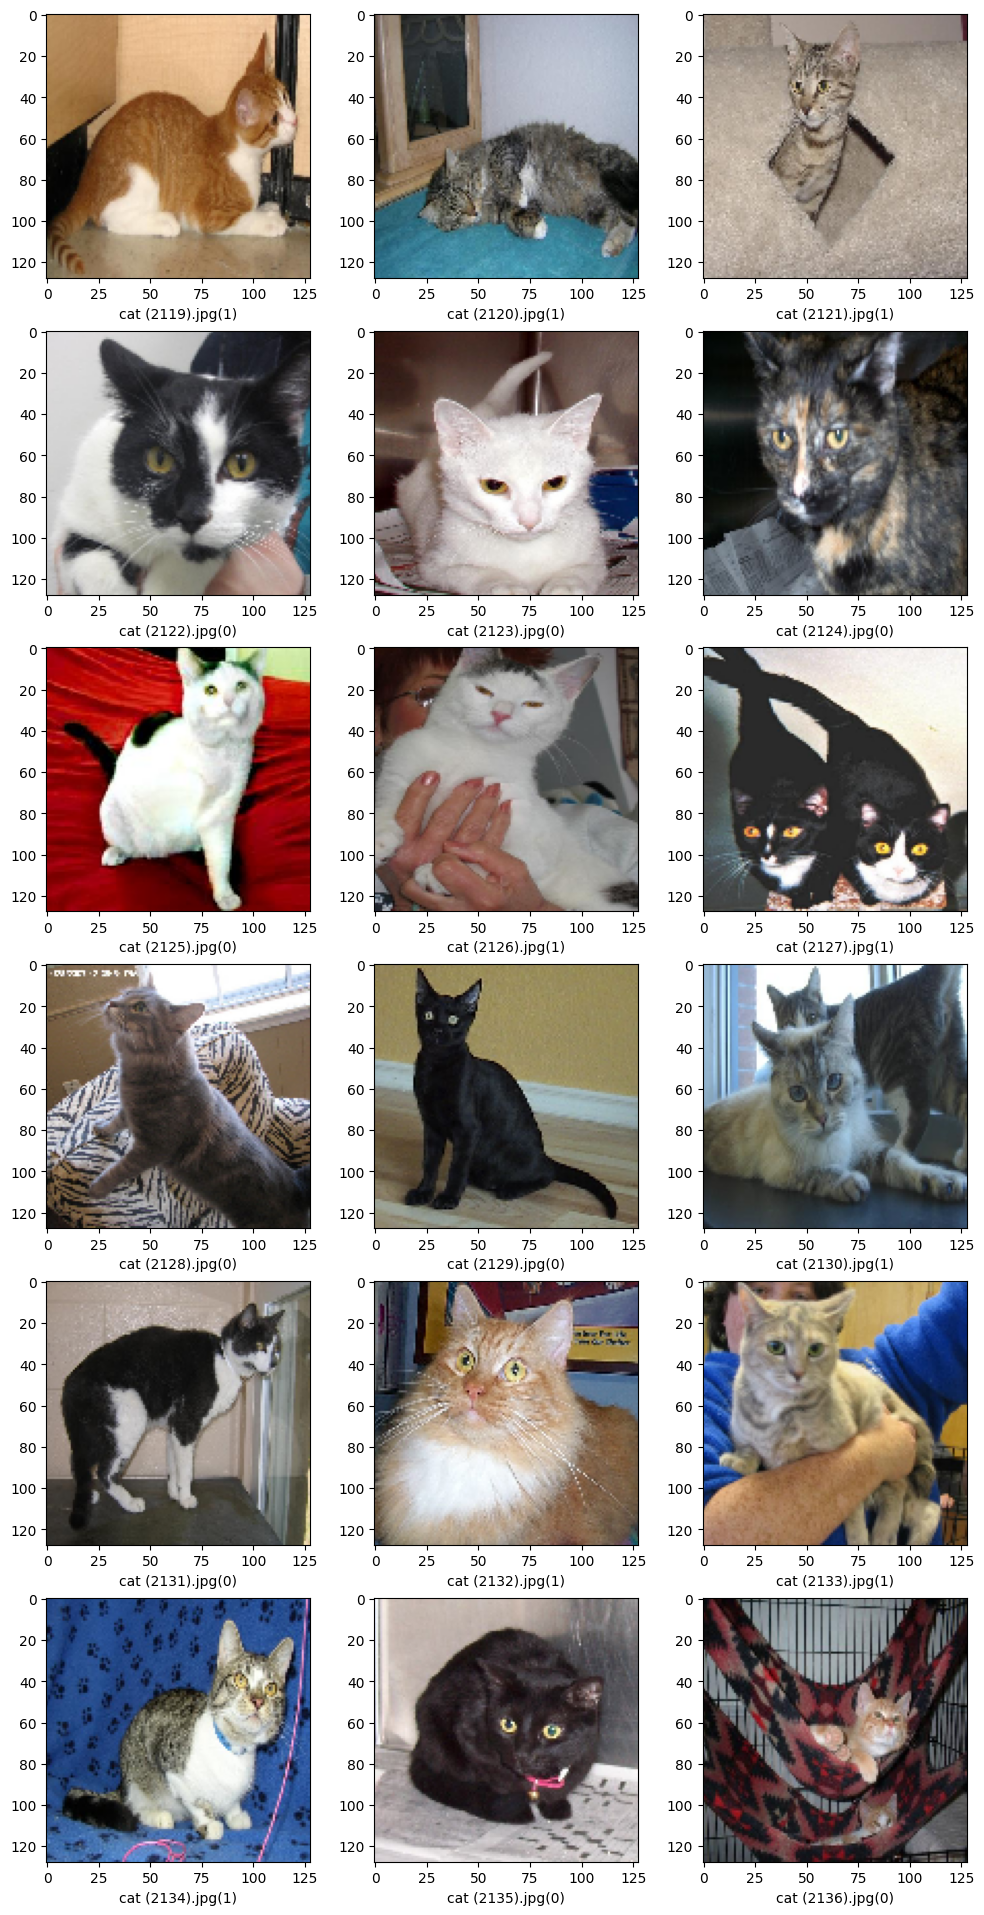

In [11]:
test_df['category'] = np.argmax(predict, axis=-1)
sample_test = test_df.head(18)
#sample_test.head()
#sample_test.tail()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("catsdogs/test/"+filename, target_size=IMAGE_SIZE)
    fig=plt.subplot(6, 3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.show()

In [12]:
model_json=m.to_json()
with open('m.json','w') as json_file:
    json_file.write(model_json)